In [107]:
# Author - Ritvik Khanna 
# Date - 04/05/18 
# Version - 1.0


import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt #importing graph plotting functionality
# import os
# print(os.listdir("../input"))
# Load dataset
df = pd.read_csv("car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
df.head(15)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [108]:
print(df.groupby('class').size())

class
acc       384
good       69
unacc    1210
vgood      65
dtype: int64


In [109]:
category_col =["buying","maint", "doors", "persons", "lug_boot","safety","class"] 
df = pd.get_dummies(df, columns=category_col)
# labelEncoder = preprocessing.LabelEncoder()
# for col in category_col:
#     df[col] = labelEncoder.fit_transform(df[col])

In [110]:
df.head(15)

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
5,0,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
7,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
8,0,0,0,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
9,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [95]:
# category_col_1 =['class'] 

# df = pd.get_dummies(df, columns=category_col_1, drop_first=True)

In [96]:
df.head(15)


,buying,maint,doors,persons,lug_boot,safety,class_1,class_2,class_3
0,3,3,0,0,2,1,0,1,0
1,3,3,0,0,2,2,0,1,0
2,3,3,0,0,2,0,0,1,0
3,3,3,0,0,1,1,0,1,0
4,3,3,0,0,1,2,0,1,0
5,3,3,0,0,1,0,0,1,0
6,3,3,0,0,0,1,0,1,0
7,3,3,0,0,0,2,0,1,0
8,3,3,0,0,0,0,0,1,0
9,3,3,0,1,2,1,0,1,0


In [73]:
X = df.iloc[:, 0:6].values
y = df.iloc[:, 6:].values
## Without Normalizing
X = preprocessing.scale(X)

/Users/ritvikkhanna/VirtualEnvironments/PyTorch/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [74]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, labels_train, labels_test = train_test_split(X, y, random_state = 42)
print (len(feature_train))
print (len(feature_test))

1296
432


In [75]:
feature_train_v = Variable(torch.FloatTensor(feature_train), requires_grad = False)
labels_train_v = Variable(torch.FloatTensor(labels_train), requires_grad = False)
feature_test_v = Variable(torch.FloatTensor(feature_test), requires_grad = False)
labels_test_v = Variable(torch.FloatTensor(labels_test), requires_grad = False)
print (feature_train_v[0])
print (labels_train_v[0])

tensor([ 0.4472, -1.3416,  0.4472,  0.0000,  1.2247,  1.2247])
tensor([ 0.,  1.,  0.])


In [76]:
class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.h_layer = nn.Linear(6, 3)
        self.s_layer = nn.Softmax()
    def forward(self,x):
        y = self.h_layer(x)
        p = self.s_layer(y)
        return p
model = LinearClassifier() #declaring the classifier to an object
loss_fn = nn.BCELoss() #calculates the loss
optim = torch.optim.SGD(model.parameters(), lr = 0.01)

In [77]:
all_losses = []
for num in range(5000): #5000 iterations
    pred = model(feature_train_v) #predict
    loss = loss_fn(pred, labels_train_v) #calculate loss
    all_losses.append(loss.data)
    optim.zero_grad() #zero gradients to not accumulate
    loss.backward() #update weights based on loss
    optim.step() #update optimiser for next iteration

/Users/ritvikkhanna/VirtualEnvironments/PyTorch/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


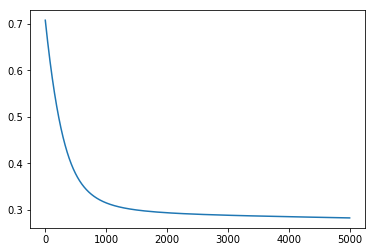

tensor([ 0.0819,  0.8882,  0.0299])
tensor([ 0.,  0.,  0.])
0.28277140855789185


In [78]:
all_losses = np.array(all_losses, dtype = np.float)
all_losses
plt.plot(all_losses)
plt.show()
print(pred[3])
print(labels_train_v[3])
print(all_losses[-1])

In [79]:
from sklearn.metrics import accuracy_score
predicted_values = []
for num in range(len(feature_test_v)):
    predicted_values.append(model(feature_test_v[num]))

/Users/ritvikkhanna/VirtualEnvironments/PyTorch/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [80]:
score = 0
for num in range(len(predicted_values)):
    if np.argmax(labels_test[num]) == np.argmax(predicted_values[num].data.numpy()):
        score = score + 1
accuracy = float(score / len(predicted_values)) * 100
print ('Testing Accuracy Score is ' + str(accuracy))

Testing Accuracy Score is 68.28703703703704
